In [1]:
import numpy as np

In [2]:
Test_Matrix = np.array([[131,673,234,103,18],
                        [201,96,342,965,150],
                        [630,803,746,422,111],
                        [537,699,497,121,956],
                        [805,732,524,37,331]])

In [ ]:
pos = [4,4]
Sum = Test_Matrix[4,4]
for i in range(8):
    try: #in case it reaches the first row
        Next_Num_1 = Test_Matrix[pos[0]-1,pos[1]]
    except:
        Next_Num_1 = 999999999
    
    try: #in case it reaches the first column
        Next_Num_2 = Test_Matrix[pos[0],pos[1]-1]
    except:
        Next_Num_2 = 999999999
    
    if Next_Num_1 < Next_Num_2:
        Sum += Next_Num_1
        pos[0] -= 1 
    else:
        Sum += Next_Num_2
        pos[1] -= 1

In [ ]:
Sum

### Application

In [3]:
Problem_Matrix = open("p081_matrix.txt",'r')

In [4]:
Prob_Matrix = []
for row in Problem_Matrix:
    Row = row.split(',')
    Row[-1] = Row[-1][:-1]                     #not to take '\n'
    Prob_Matrix.append(list(map(int,Row)))
Prob_Matrix = np.array(Prob_Matrix)

In [ ]:
Prob_Matrix = []
for row in Problem_Matrix:
    Row = row.split(',')
    Row[-1] = Row[-1][:-1]
    Prob_Matrix.append(Row)
Prob_Matrix = np.array(Prob_Matrix)

In [5]:
def get_min_sum(n):
    pos = [n-1,n-1]
    Sum = int(Prob_Matrix[n-1,n-1])
    for i in range(2*(n-1)):
        try: #in case it reaches the first row
            Next_Num_1 = int(Prob_Matrix[pos[0]-1,pos[1]])
        except:
            Next_Num_1 = 999999999
    
        try: #in case it reaches the first column
            Next_Num_2 = int(Prob_Matrix[pos[0],pos[1]-1])
        except:
            Next_Num_2 = 999999999
    
        if Next_Num_1 < Next_Num_2:
            Sum += Next_Num_1
            pos[0] -= 1 
        else:
            Sum += Next_Num_2
            pos[1] -= 1
    print(Sum)

In [6]:
%time get_min_sum(80)

522499
Wall time: 1 ms


## Version 2

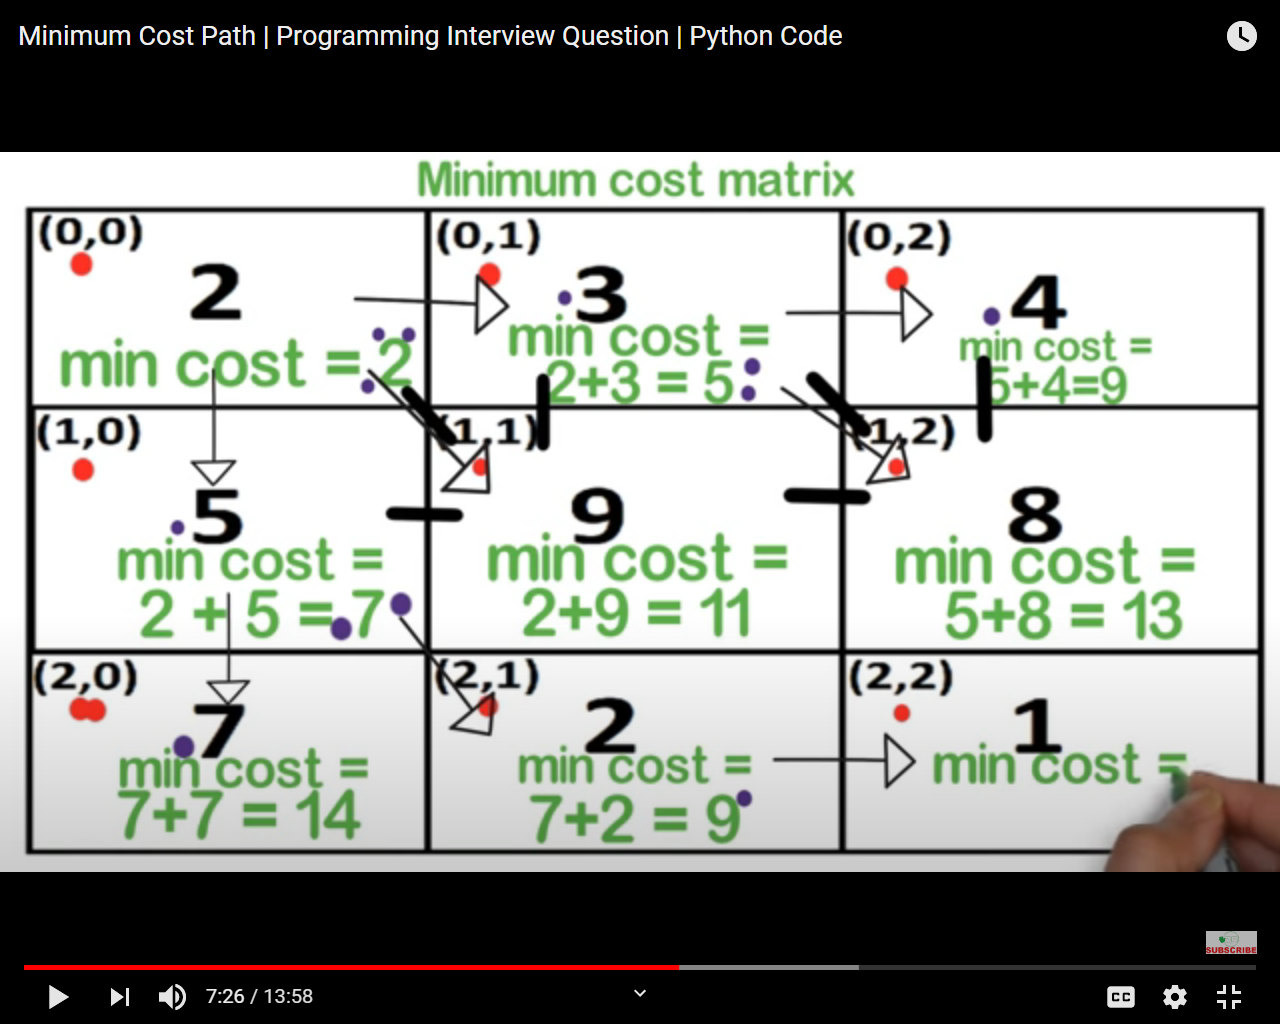

In [7]:
from IPython.display import Image
Image("Idea.png")

In [8]:
def get_min_in_firsts(n):
    #put the minimum cost in each cell in the first row and column
    min_sum_matrix = np.zeros((80,80))
    min_sum_matrix[0,0] = int(Prob_Matrix[0,0])
    for i in range(1,n):
        min_sum_matrix[0,i] = min_sum_matrix[0,i-1] + int(Prob_Matrix[0,i])
        min_sum_matrix[i,0] = min_sum_matrix[i-1,0] + int(Prob_Matrix[i,0])
    return min_sum_matrix

In [9]:
def get_min(matrix):
    n = matrix.shape[0]
    for i in range(1,n):
        if matrix[i-1,i] < matrix[i,i-1]:     #editing the pivot
            matrix[i,i] = matrix[i-1,i] + int(Prob_Matrix[i,i])
        else:
            matrix[i,i] = matrix[i,i-1] + int(Prob_Matrix[i,i])
            
        for j in range(i+1,n):           
            if matrix[i-1,j] < matrix[i,j-1]:  #editing the whole row
                matrix[i,j] = matrix[i-1,j] + int(Prob_Matrix[i,j])
            else:
                matrix[i,j] = matrix[i,j-1] + int(Prob_Matrix[i,j])
            
            if matrix[j-1,i] < matrix[j,i-1]:   #editing the whole column
                matrix[j,i] = matrix[j-1,i] + int(Prob_Matrix[j,i])
            else:
                matrix[j,i] = matrix[j,i-1] + int(Prob_Matrix[j,i])
    
    return matrix

In [10]:
%time get_min(get_min_in_firsts(80))[79,79]

Wall time: 46 ms


427337.0

## Another sol

In [1]:
def get_min_path(matrix):
    min_path_matrix = np.ones(matrix.shape)*999999
    min_path_matrix[0,0] = matrix[0,0]
    for row in range(matrix.shape[0]):
        for col in range(matrix.shape[0]):
            n = matrix.shape[0]
            
            if col < n-1:
                right_val = min_path_matrix[row,col] + matrix[row,col+1]
                if right_val < min_path_matrix[row,col+1]:
                    min_path_matrix[row,col+1] = right_val
            
            if row < n-1:
                down_val = min_path_matrix[row,col] + matrix[row+1,col]
                if down_val < min_path_matrix[row+1,col]:
                    min_path_matrix[row+1,col] = down_val
    
    return min_path_matrix

In [4]:
import numpy as np
Problem_Matrix = open('p081_matrix.txt','r')
Prob_Matrix = np.array([list(map(int, line.strip().split(','))) for line in Problem_Matrix])
Problem_Matrix.close()

In [6]:
%time get_min_path(Prob_Matrix)[-1,-1]

Wall time: 40 ms


427337.0

### Using "Dijkstra’s Shortest Path Algorithm":
- https://www.youtube.com/watch?v=pVfj6mxhdMw